# QuTiP example: Single-Qubit Dynamics - RWA - 2Dsim

This example shows how to implement 2 - dimensional simulation and 2D plot in qutip

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from qutip import *
from qutip.ui.progressbar import TextProgressBar as ProgressBar

In [4]:
options = Options(nsteps=200000)
use_rwa = True
def calculate():
    rmat = np.zeros((len(frelist),3,len(tlist)))
    pbar = ProgressBar(len(frelist))
    # collapse operators
    c_ops = []
    if g1 > 0.0:
        c_ops.append(np.sqrt(g1) * sigmam())
    if g2 > 0.0:
        c_ops.append(np.sqrt(g2) * sigmaz())

    for i in range(len(frelist)):
        pbar.update(i)
        wmw = frelist[i]
        H0 = 0
        H1 = 0
        args={'wmw': wmw}
        if use_rwa:
            H = (w0-wmw) / 2.0 * sigmaz() + wR / 2.0 * sigmax()
            output = mesolve(H, rho0, tlist, c_ops, [sigmax(),sigmay(),sigmaz()],options=options)           
        else: 
            H = [H0,[H1,'np.sin(wmw*t)*np.heaviside(0.5-t,0)']]
            output = mesolve(H, rho0, tlist, c_ops, [sigmax(),sigmay(),sigmaz()],args,options=options)
        rmat[i] = output.expect # output.expect[2]
    return rmat

In [6]:
w0 = 10 * 2 * np.pi # qubit frequency
wR = 0.3 * 2 * np.pi  # Rabi amplitude

#### For a Hadamard gate
frelist = np.array([w0-wR]) # np.linspace(6,14,51) * 2* np.pi 
assert np.abs(w0-frelist[0] - wR) < 1e-14
# np.sqrt(((w0-wmw) / np.sqrt(2.0))**2 + (wR / np.sqrt(2.0))**2)
T_pi = np.pi / (2**0.5 * wR)

tmax = T_pi # 10
tlist = np.linspace(0,tmax,201)

g2 = 0.0
g1 = 0.0

# rho0_list = []
rmat_stack = np.empty((2,3,len(tlist)), dtype=np.float64)
for j in range(2):
    rho0 = ket2dm(basis(2,j))
    rmat=calculate()
    rmat_stack[j,:,:] = rmat[0,:,:]

# initial state
# rho0 = ket2dm(basis(2,0))
# rmat=calculate()

In [7]:
plt.style.use('../note.mplstyle')

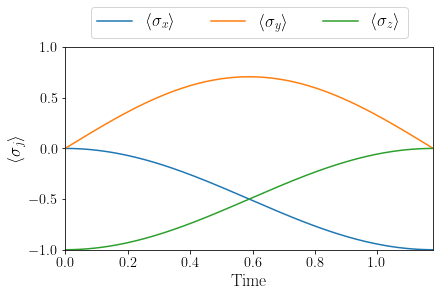

In [9]:
fig, ax = plt.subplots(constrained_layout=True)

ax.set_ylim(-1,1)
ax.set_xlim(tlist[[0,-1]])

for j in range(rmat.shape[1]):
    index = 'xyz'[j]
    ax.plot(tlist, rmat_stack[1,j,:], label=fr'$\langle \sigma_{{{index}}} \rangle$')
    
ax.legend(loc='lower center', bbox_to_anchor=(0.5,1), ncol=3, fontsize='xx-large')
ax.set_xlabel('Time')
ax.set_ylabel(r'$\langle \sigma_{{j}} \rangle$')

# fig.savefig("bloch-vec-test-004.png")

In [10]:
# Make data
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

In [11]:
%matplotlib notebook

<IPython.core.display.Javascript object>


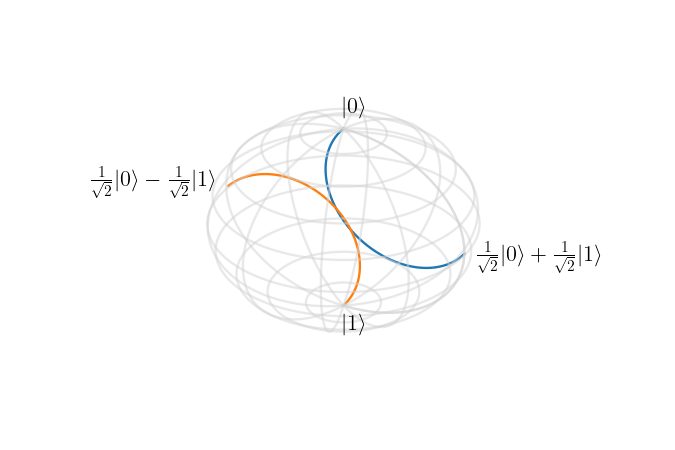

In [13]:
fig = plt.figure(constrained_layout=True)
ax = fig.add_subplot(111, projection='3d')

ax.set_axis_off()

ax.set_xlim(-1,1), ax.set_ylim(-1,1), ax.set_zlim(-1,1)

ax.plot_wireframe(x, y, z, color='lightgray', alpha=0.5, rstride=10, cstride=10)

for j in range(2):
    xyz = rmat_stack[j,:,:]
    ax.plot3D(xyz[0], xyz[1], xyz[2]) # color='k'
    
txtprop = dict(fontsize='x-large')
zmargin = 0.1
ax.text(0,0,1+zmargin,r'$|0\rangle$', va='bottom', **txtprop)
ax.text(0,0,-1-zmargin,r'$|1\rangle$', va='top', **txtprop)
ax.text(1+zmargin,0,0,r'$\frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle$', ha='left', va='center', **txtprop)
ax.text(-1-zmargin,0,0,r'$\frac{1}{\sqrt{2}}|0\rangle - \frac{1}{\sqrt{2}}|1\rangle$', ha='right', va='center', **txtprop)
    
# fig.savefig("bloch-traj-test-009.png", bbox_inches='tight')

In [14]:
# fig, ax = plt.subplots(figsize=(8, 8))

# t_mat, fre_mat = np.meshgrid(tlist, frelist/(2*np.pi))

# ax.pcolor(t_mat, fre_mat, rmat)
# ax.set_xlabel(r'time ($\mu$s)')
# ax.set_ylabel(r'Frequency $MHz$')
# ax.set_title("<Sz>");

## Versions

In [15]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,4.7.1
Numpy,1.20.3
SciPy,1.7.3
matplotlib,3.5.1
Cython,0.29.32
Number of CPUs,6
BLAS Info,OPENBLAS
IPython,7.30.1
Python,"3.8.10 (default, Mar 15 2022, 12:22:08) [GCC 9.4.0]"
OS,posix [linux]
